## Reviewing Unsupervised Learning

Unsupervised learning is basically about finding patterns in data. For example, clustering customers by their purchasing behavior.

There are two types of unsupervised learning:
1. Clustering
2. Dimensionality reduction

Searching for patterns and correlations among those purchasing behaviors and using these patterns to express the data in a compressed form (dimensionality reduction).

## Iris Dataset Practice

This dataset contains measurements of many iris plants. Three species are present, versicolor, setosa, and virginica. Features include sepal length, sepal width, petal length, and petal width.

Iris data is a 4-dimensional dataset since it has 4 features/measurements. Dimensions are too high to directly visualize, but using unsupervised learning gives us insights into the data.

## K-Means Clustering

- Finds clusters of samples. 
- Numbers of clusters must be specified beforehand.
- Implemented in `sklearn.cluster.KMeans` (scikit-learn)

In [1]:
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()
samples = iris.data
species = iris.target

# Print info about the dataset
print("Dataset shape:", samples.shape)
print("\nFeature names:", iris.feature_names)
print("\nTarget names (species):", iris.target_names)


Dataset shape: (150, 4)

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Target names (species): ['setosa' 'versicolor' 'virginica']


In [2]:
from sklearn.cluster import KMeans

# Specifying 3 clusters since there are 3 species
model = KMeans(n_clusters=3)
model.fit(samples)

# Predicting the labels
labels = model.predict(samples)
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


## K-Means Continued

- If new samples were added to the existing cluster, k-means can still determine which clusters they belong to without re-training the model. 
- K-means does this by remembering the mean of samples in each cluster. These are called **centroids**.
- New samples are assigned to the nearest centroid.

## Plotting different species

- Scatter plot of sepal length vs sepal width colored by species.
- Each point represents an iris sample.
- Color points by cluster labels.

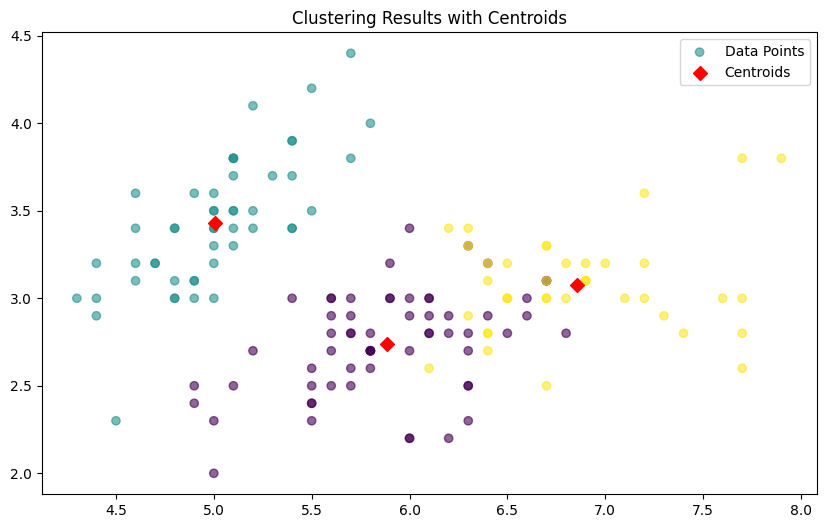

In [3]:
import matplotlib.pyplot as plt

# Assign the columns of new_points: xs and ys
xs = samples[:, 0]
ys = samples[:, 1]

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Create a single plot with both data points and centroids
plt.figure(figsize=(10, 6))

# Plot the data points, colored by their cluster labels
plt.scatter(xs, ys, c=labels, alpha=0.6, label='Data Points')

# Plot the centroids with a different marker and color
plt.scatter(centroids_x, centroids_y, 
           c='red',           # Make centroids red
           marker='D',        # Diamond shape for centroids
           s=50,            # Larger size for centroids
           label='Centroids')

plt.title('Clustering Results with Centroids')
plt.legend()
plt.show()

## Evaluating a clustering

- Can check correspondence with e.g. iris species
- And if there are no species to check with, we will consider the problem of how to measure the quality of a clustering in a way that doesn't require ground truth labels. This then informs choice of how many clusters to look for.

### Iris: Clusters vs Species

- K-means found 3 clusters among the iris samples.
- Do the clusters respond to the species? Let's check with a crosstab.

In [4]:
import pandas as pd

iris = pd.DataFrame({'labels': labels, 'species': species})
ct = pd.crosstab(iris['labels'], iris['species'])
print(ct)

species   0   1   2
labels             
0         0  47  14
1        50   0   0
2         0   3  36


## Cross Tabulation Results

1. Cluster 0 is perfect:
    - Contains all 50 setosa samples (species 0)
No mixing with other species
2. Cluster 1 is mixed:
    - Contains 3 versicolor samples (species 1)
    - Contains 36 virginica samples (species 2)
3. Cluster 2 is also mixed:
    - Contains 47 versicolor samples (species 1)
    - Contains 14 virginica samples (species 2)


## Measuring the quality of a clustering

- We need a way to measure the quality of a clustering that uses only the clusters and the samples themselves, without any prior knowledge of the true labels.
- A good clustering has tight clusters meaning that the samples in each clusters are branched together, not spread out.
- How spread out the samples within each cluster are is measured by the **inertia**. Intuitively, interia measures how far the samples are from the centroid of the cluster.
- K-means aims to place the clusters in a way that minimizes the inertia.
- After `fit`, available has attribute `model.inertia_`.


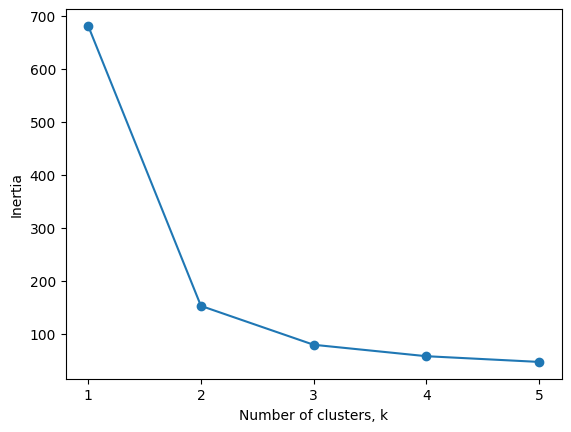

In [5]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)

    # Fit model to samples
    model.fit(samples)

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

## Inertia and number of clusters 

In the images above, we are looking at the relationship between the number of clusters and the inertia. As we can see the inertia decreases as the number of clusters increases. But at around 3 clusters, the inertia improvements starts to plateau.

### How many clusters to choose?

- A good clustering has tight clusters(low inertia), but not too many clusters.
- Choose an *elbow* in the plot, that is where the inertia begins to decrease more slowly. So, in the plot above, k=3 is a good choice.

## Transforming features for better clustering

- New dataset: Piedmont wines dataset.
- 178 samples from 3 different regions in Piedmont: Barolo, Grignolino, and Barbera.
- Features measure chemical composition e.g., alcohol content
- Visual properties like color intensity

In [6]:
# Load wine dataset
from sklearn.datasets import load_wine

wine_data = load_wine()

# Create dataframe
import pandas as pd
df = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)

# Add target column for the wine variety
df['variety'] = wine_data.target

# Create samples for clustering
samples = df.drop('variety', axis=1)

# Display first few rows and info
print("\nFirst few rows:")
print(df.head())
print("\nDataset info:")
print(df.info())

# Create labels
labels = pd.Series(wine_data.target, name='labels')


First few rows:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  var

In [7]:
from sklearn.cluster import KMeans

# Get varieties from the wine dataset target names
varieties = wine_data.target_names[wine_data.target]

model = KMeans(n_clusters=3)
labels = model.fit_predict(samples)

df = pd.DataFrame({'labels': labels, 'varieties': varieties})
ct = pd.crosstab(df['labels'], df['varieties'])
print(ct)

varieties  class_0  class_1  class_2
labels                              
0               31        7       11
1                1       64       37
2               27        0        0


## Feature Variance

- As we can see from the crosstab, the clusters are not very good.
- The problem is that the features have different scales/variances.
- Variance of a feature measures spread of the feature values.
- For example, the feature 'proline' is significantly larger than the other features.

## Standardizing features with `StandardScaler`

- In KMeans clustering, the variance of a feature corresponds to it's influence on the inertia and therefore the quality of the clustering.
- To give every feature a fair chance, we need to standardize the features to have the same or kind of equal variance.
- This can be done using `StandardScaler` from `sklearn.preprocessing` which transforms features to have mean 0 and variance 1.

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
kmeans = KMeans(n_clusters=3)
pipeline = make_pipeline(scaler, kmeans)

labels = pipeline.fit_predict(samples)

df = pd.DataFrame({'labels': labels, 'varieties': varieties})
ct = pd.crosstab(df['labels'], df['varieties'])
print(ct)

# Much better clustering below!

varieties  class_0  class_1  class_2
labels                              
0                0        3       48
1                0       65        0
2               59        3        0
